## Structuring your data for exploration

### This is a step by step to clean the dataset

In [101]:
import pickle 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import graphviz
import seaborn as sns
plt.style.use('ggplot')

In [104]:
df = pd.read_csv('heart.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,DEATH_EVENT_S
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1.0,dead
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1.0,dead
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1.0,dead
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# Data structure
# Number of rows and columns
df.shape

(311, 14)

In [107]:
# Make the head of the columns lowercase for consistency
df.columns = [name.lower() for name in df.columns]
# df.columns
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event,death_event_s
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1.0,dead
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1.0,dead
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1.0,dead
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
#check duplicate data
df.duplicated().sum()
print(f"number of duplicated: {df.duplicated().sum()}")
df[df.duplicated()]

number of duplicated: 10


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event,death_event_s
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1.0,dead
8,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1.0,dead
9,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1.0,dead
10,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1.0,dead
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'No of rows')

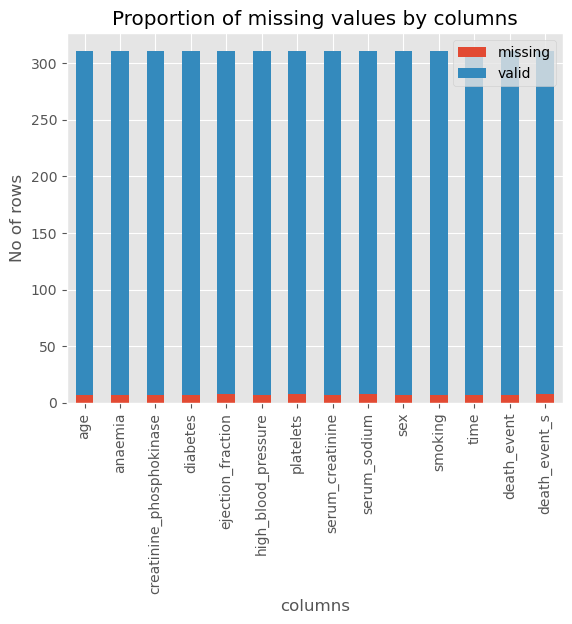

In [117]:
# Look for missing values
#1. missing values by columns
# df.isna().sum()
nan_by_col = df.isna().sum().reset_index()
nan_by_col.columns = ["columns", "missing"]
nan_by_col["valid"] = [len(df) - c for c in nan_by_col.missing]
nan_by_col = nan_by_col.set_index("columns")
g = nan_by_col.plot(kind="bar", stacked=True)
g.set_title("Proportion of missing values by columns")
g.set_ylabel("No of rows")


In [120]:
total_nan = df.isna().sum()
print(f"number of NaN: {total_nan}")

number of NaN: age                         7
anaemia                     7
creatinine_phosphokinase    7
diabetes                    7
ejection_fraction           8
high_blood_pressure         7
platelets                   8
serum_creatinine            7
serum_sodium                8
sex                         7
smoking                     7
time                        7
death_event                 7
death_event_s               8
dtype: int64


No. of rows with at least one Na: 8
No. of rows full Na: 7


<Axes: >

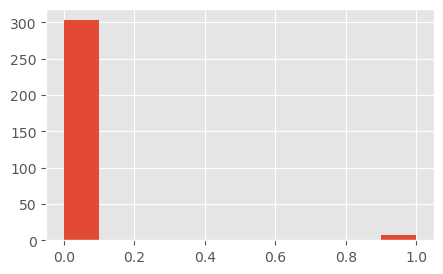

In [122]:
nr_rows_min_one_na = df.isna().any(axis=1).sum()
print(f"No. of rows with at least one Na: {nr_rows_min_one_na}")

nr_rows_full_na = df.isna().all(axis=1).sum()
print(f"No. of rows full Na: {nr_rows_full_na}")

perc_na_per_row = df.isna().sum(axis=1) /len(df.columns) 
perc_na_per_row.hist(figsize=(5,3))

In [123]:
#remove rows that contain missing values
df = df.dropna().copy()
df.shape

(303, 14)

In [124]:
#remove the duplicate data
df = df.drop_duplicates()
df.shape

(299, 14)

In [125]:
# explore the datatype
df.dtypes

age                         float64
anaemia                     float64
creatinine_phosphokinase    float64
diabetes                    float64
ejection_fraction           float64
high_blood_pressure         float64
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
sex                         float64
smoking                     float64
time                        float64
death_event                 float64
death_event_s                object
dtype: object

In [127]:
df = df.astype({
                "anaemia": "bool",
                "diabetes": "bool",
                "high_blood_pressure": "bool",
                "sex": "category",
                "smoking": "bool",
                "death_event": "bool",
                "death_event_s": "category",
                
})
df.dtypes

age                          float64
anaemia                         bool
creatinine_phosphokinase     float64
diabetes                        bool
ejection_fraction            float64
high_blood_pressure             bool
platelets                    float64
serum_creatinine             float64
serum_sodium                 float64
sex                         category
smoking                         bool
time                         float64
death_event                     bool
death_event_s               category
dtype: object

In [129]:
#convert age from int64 to int
df.age = np.floor(df.age).astype("int64")
df.dtypes

age                            int64
anaemia                         bool
creatinine_phosphokinase     float64
diabetes                        bool
ejection_fraction            float64
high_blood_pressure             bool
platelets                    float64
serum_creatinine             float64
serum_sodium                 float64
sex                         category
smoking                         bool
time                         float64
death_event                     bool
death_event_s               category
dtype: object

In [132]:
#detect the difference between death_event and death_event_s; death_event is the boolean,
# while death_event_s is the string variable. Also notice the wrong spellings of the words
df[["death_event", "death_event_s"]]

,death_event,death_event_s
0,True,dead
1,True,dead
2,True,dead
11,True,dead
12,True,dead
...,...,...
306,False,alive
307,False,alive
308,False,alive
309,False,aliv


In [137]:
#inspect the string variable
df.select_dtypes(exclude=["float64", "int64"]).describe()

,anaemia,diabetes,high_blood_pressure,sex,smoking,death_event,death_event_s
count,299,299,299,299.0,299,299,299
unique,2,2,2,2.0,2,2,2
top,False,False,False,1.0,False,False,alive
freq,170,174,194,194.0,203,203,203


In [134]:
# what are the inconsistent values
df.death_event_s.unique()

['dead', 'alive', 'aliv', ' Alive']
Categories (4, object): [' Alive', 'aliv', 'alive', 'dead']

In [136]:
# perform a string process to update the consistency
df.death_event_s = df.death_event_s.str.lower().str.strip()
df.death_event_s = df.death_event_s.replace("aliv", "alive")
df.death_event_s.unique()

array(['dead', 'alive'], dtype=object)

In [138]:
#define the sex as male and female
df.sex = df.sex.replace({0.0: "female", 1.0: "male"})


/var/folders/_z/csjn6k555zq71h92fs96ty3h0000gn/T/ipykernel_13150/253873532.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.sex = df.sex.replace({0.0: "female", 1.0: "male"})


In [139]:
# check the summary statistics for the numerical values
df.select_dtypes(include=["float64", "int64"]).describe()


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.829431,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894997,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


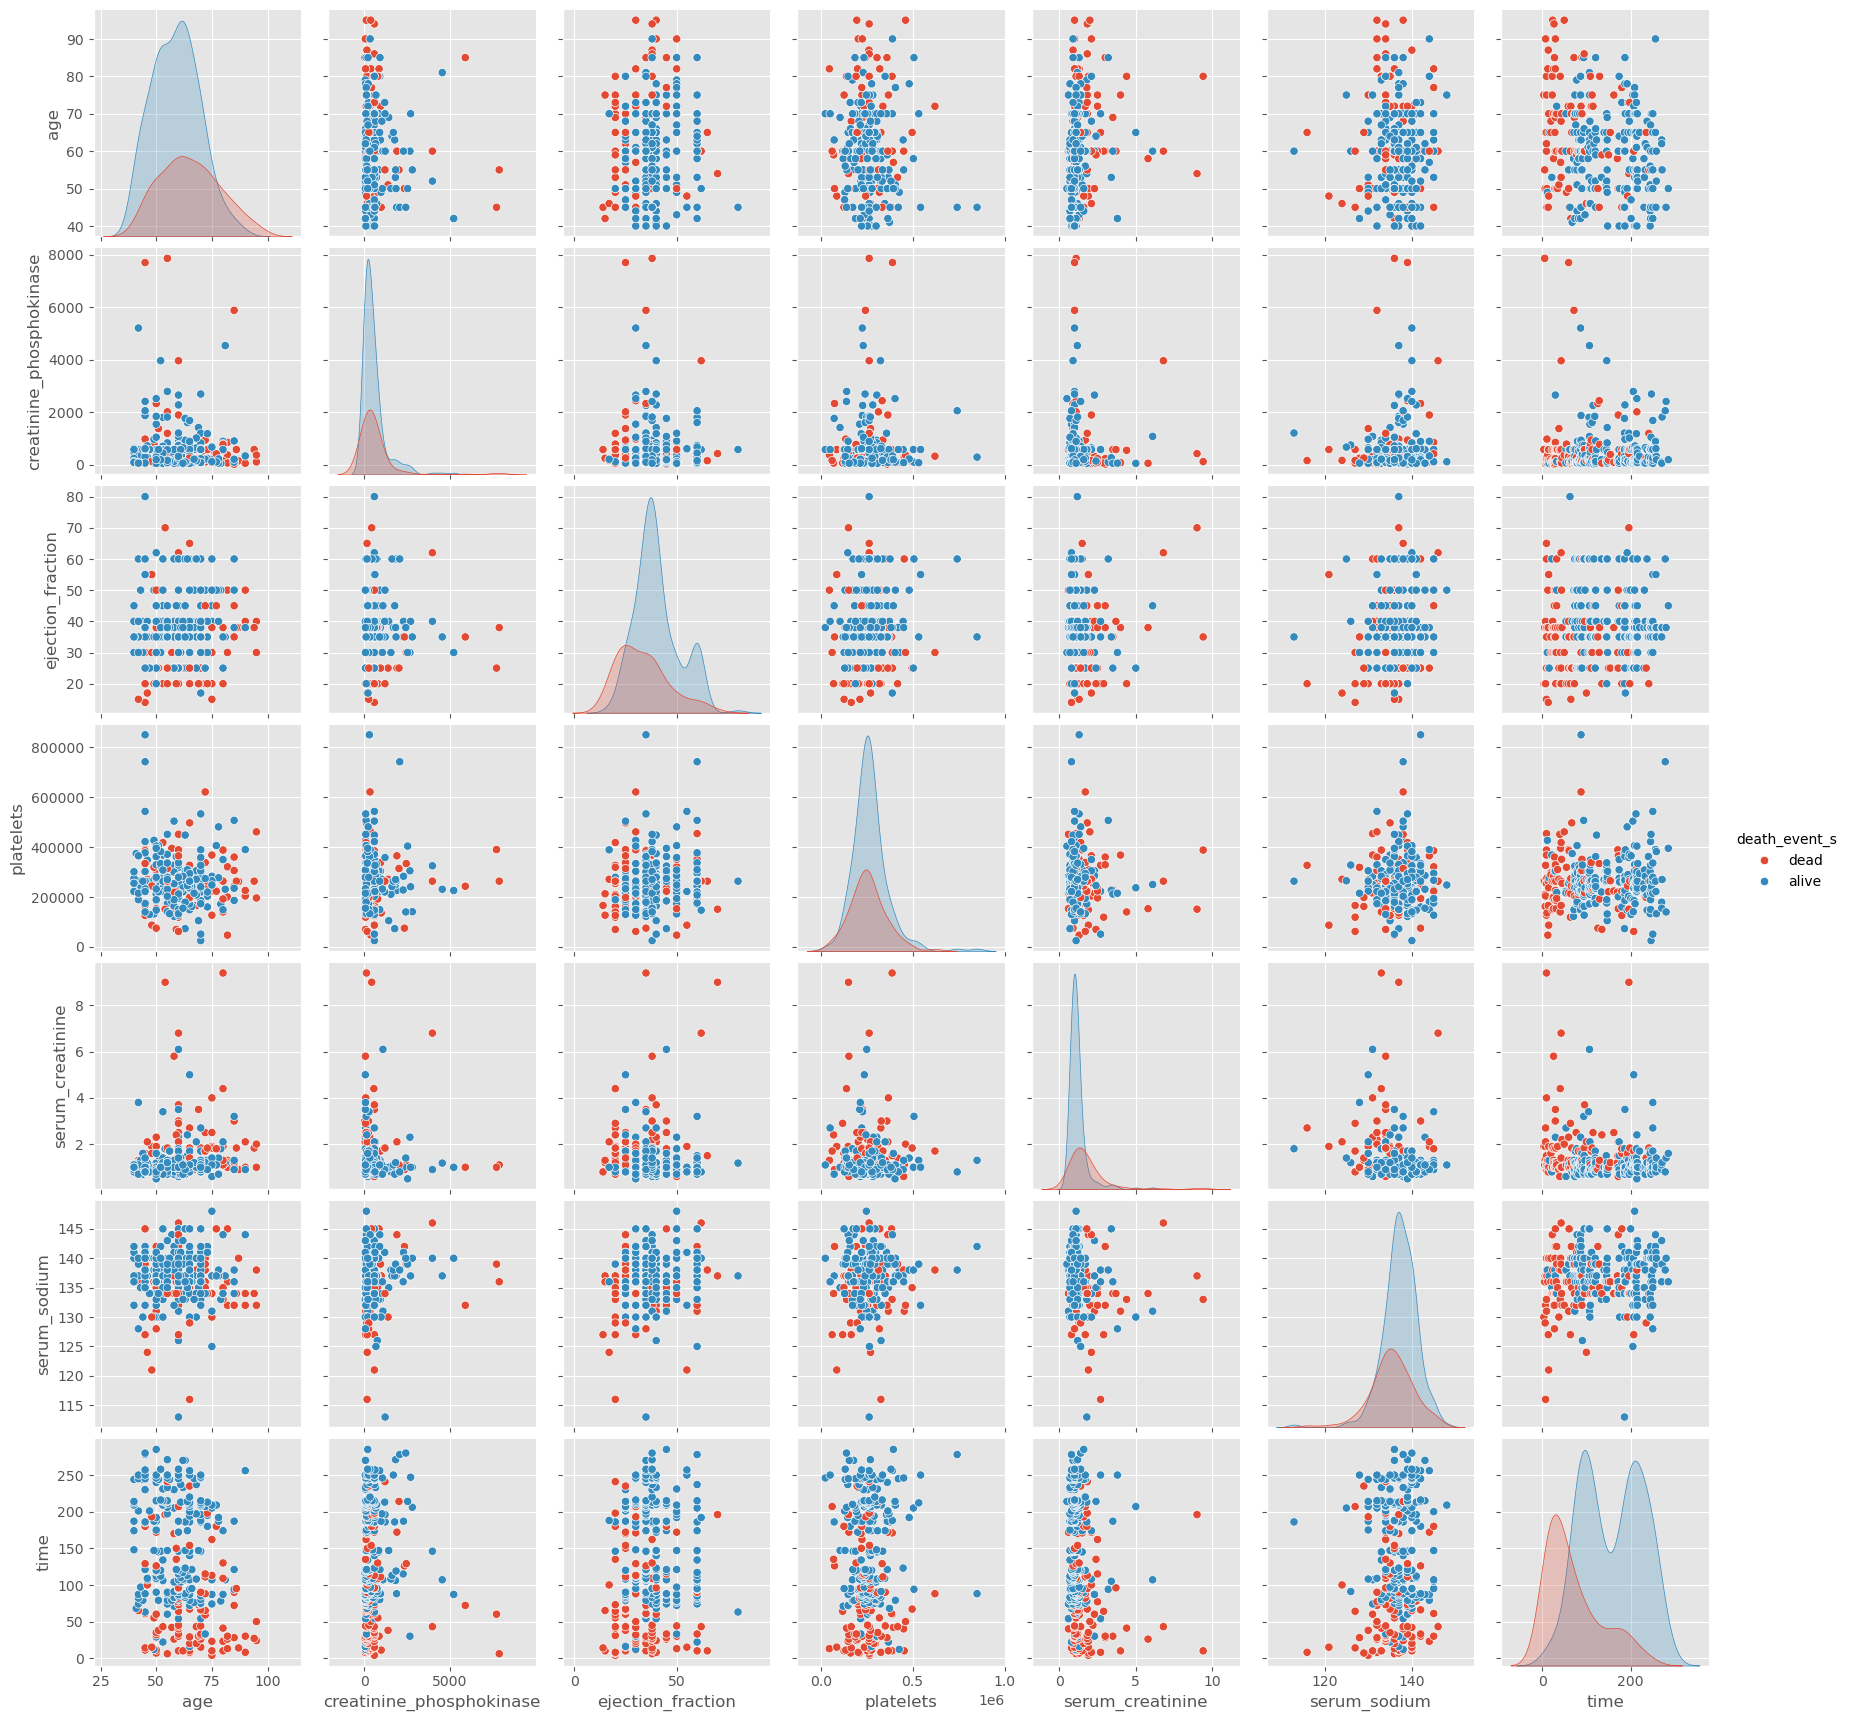

In [143]:
#get visual representation
num_df = df.select_dtypes(include=["float64", "Int64"])
num_df["death_event_s"] = df["death_event_s"]
sns.pairplot(num_df, hue="death_event_s")

<Axes: xlabel='age', ylabel='Count'>

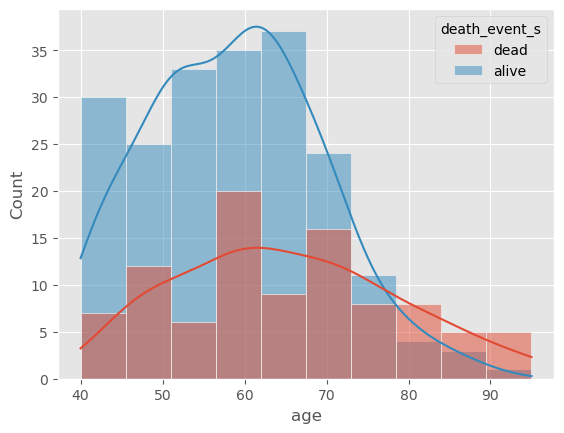

In [146]:
sns.histplot(data=df, x = "age", hue="death_event_s", kde=True)

<Axes: xlabel='serum_creatinine', ylabel='serum_sodium'>

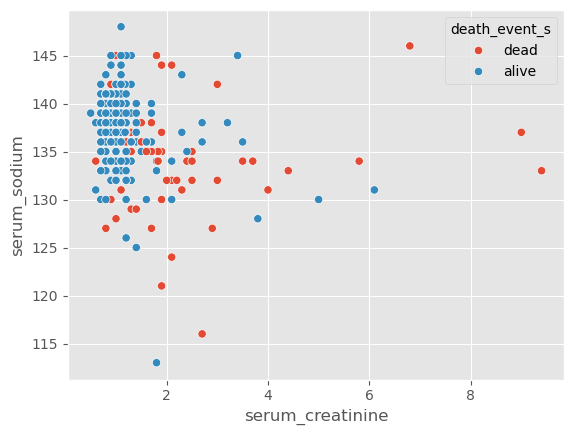

In [148]:
sns.scatterplot(data=df, y="serum_sodium", x = "serum_creatinine", hue="death_event_s")

<Axes: xlabel='sex', ylabel='smoking'>

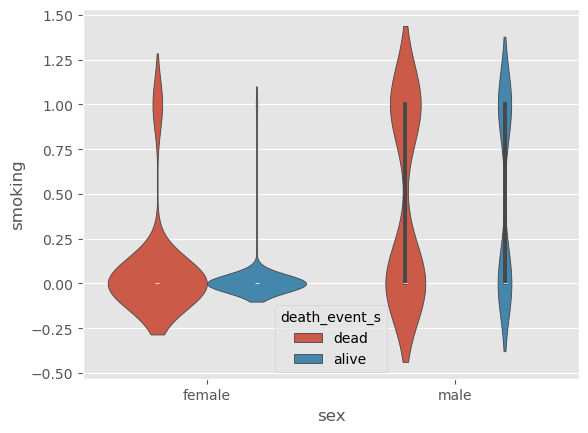

In [150]:
sns.violinplot(data=df, x="sex", y="smoking", hue="death_event_s")

In [151]:
from copy import deepcopy
import plotly.graph_objects as go